In [123]:
rm *.json TSLA*.csv

# Stock data scraper

In [652]:
import urllib.request, json , time, os, difflib, itertools
import pandas as pd
from multiprocessing.dummy import Pool
from datetime import datetime
import http.client as httplib
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import csv

%matplotlib inline

# можно переделать сбор с yahoo через yfinance

In [117]:
def check_internet():
    conn = httplib.HTTPConnection("www.google.com", timeout=5)
    try:
        conn.request("HEAD", "/")
        conn.close()
        return True
    except:
        conn.close()
        return False

In [118]:
def stock_init():
    json_path = ""
    csv_path = ""
        
    ticker = "TSLA"
    
    csv_file = ticker + '.csv'

    period2 = str(round(datetime.now().timestamp()))
    period1 = str(round(int(period2) - 2 * 3600 * 24 * 365))
    print(period2 + " || " + str(datetime.now().strftime('%y/%m/%d')))
    print(period1 + " || " + str(datetime.utcfromtimestamp(int(period1)).strftime('%d/%m/%y')))

    interval = "1d"

    query_urls = "https://query1.finance.yahoo.com/v8/finance/chart/"+ticker+"?symbol="+ticker+"&period1="+period1+"&period2="+period2+"&interval="+interval+"&includePrePost=true&events=div%2Csplit"
    
    return ticker, json_path, csv_path, csv_file, period1, period2, interval, query_urls

In [119]:
def get_frame(parsed):
    Date=[]
    for i in parsed['chart']['result'][0]['timestamp']:
#         Date.append(datetime.utcfromtimestamp(int(i)).strftime('%d/%m/%y'))
        Date.append(datetime.utcfromtimestamp(int(i)).strftime('%d/%m/%y'))

        Low=parsed['chart']['result'][0]['indicators']['quote'][0]['low']
        Open=parsed['chart']['result'][0]['indicators']['quote'][0]['open']
        Volume=parsed['chart']['result'][0]['indicators']['quote'][0]['volume']
        High=parsed['chart']['result'][0]['indicators']['quote'][0]['high']
        Close=parsed['chart']['result'][0]['indicators']['quote'][0]['close']
        Adjusted_Close=parsed['chart']['result'][0]['indicators']['adjclose'][0]['adjclose']

        df=pd.DataFrame(list(zip(Date,Open,High,Low,Close, Adjusted_Close,Volume)),columns =['Date','Open','High','Low','Close','Adj Close','Volume'])
    
    return df

In [120]:
def get_historic_price(query_url,json_path,csv_path):
    
    stock_id=query_url.split("&period")[0].split("symbol=")[1]

    if os.path.exists(csv_path+stock_id+'.csv') and os.stat(csv_path+stock_id+'.csv').st_size != 0:
        print("<<<  Historical data of "+stock_id+" already exists")
        return
    
    while not check_internet():
        print("Could not connect, trying again in 5 seconds...")
        time.sleep(5)

    try:
        with urllib.request.urlopen(query_url) as url:
            parsed = json.loads(url.read().decode())
    
    except:
        print("|||  Historical data of "+stock_id+" doesn't exist")
        return
    
    else:
        if os.path.exists(json_path+stock_id+'.json') and os.stat(json_path+stock_id+'.json').st_size != 0:
            os.remove(json_path+stock_id+'.json')
        
        with open(json_path+stock_id+'.json', 'w') as outfile:
            json.dump(parsed, outfile, indent=4)
        
        try:
            df = get_frame(parsed)
            
            if os.path.exists(csv_path+stock_id+'.csv'):
                os.remove(csv_path+stock_id+'.csv')
            df.to_csv(csv_path+stock_id+'.csv', sep=',', index=None)
            
            print(">>>  Historical data of "+stock_id+" saved")
        
        except:
            print(">>>  Historical data of "+stock_id+" could not be saved")

In [121]:
def csv_draw(csv_file):

    frame = pd.read_csv(csv_file, index_col=0,parse_dates=True)
    frame.index.name = 'Date'
    
    mpf.plot(frame, type='candle', style = 'sas',  
             mav = (3,6,9),volume=True, figscale = 3,
             savefig = "TSLA_chart.png")
    
    

In [124]:
ticker, json_path, csv_path, csv_file, period1, period2, interval, query_urls = stock_init()

1671194654 || 22/12/16
1608122654 || 16/12/20


In [125]:
get_historic_price(query_urls, json_path, csv_path)

>>>  Historical data of TSLA saved


In [126]:
cp TSLA.csv TSLA2.csv

In [127]:
cp TSLA.csv TSLA3.csv

In [128]:
frame = pd.read_csv(ticker + '.csv', index_col=0)#,parse_dates=True)
frame.index.name = 'Date'
frame

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
16/12/20,209.410004,210.833328,201.666672,207.589996,207.589996,126287400
17/12/20,209.396667,219.606674,206.500000,218.633331,218.633331,168810300
18/12/20,222.966660,231.666672,209.513336,231.666672,231.666672,666378600
21/12/20,222.080002,222.833328,215.356674,216.619995,216.619995,174135900
22/12/20,216.000000,216.626663,204.743332,213.446671,213.446671,155148000
...,...,...,...,...,...,...
09/12/22,173.839996,182.500000,173.360001,179.050003,179.050003,104746600
12/12/22,176.100006,177.369995,167.520004,167.820007,167.820007,109794500
13/12/22,174.869995,175.050003,156.910004,160.949997,160.949997,175862700


In [129]:
csv_draw(ticker + ".csv")

## Data preprosessing

In [566]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [567]:
df = pd.read_csv(ticker + '3.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,16/12/20,209.410004,210.833328,201.666672,207.589996,207.589996,126287400
1,17/12/20,209.396667,219.606674,206.500000,218.633331,218.633331,168810300
2,18/12/20,222.966660,231.666672,209.513336,231.666672,231.666672,666378600
3,21/12/20,222.080002,222.833328,215.356674,216.619995,216.619995,174135900
4,22/12/20,216.000000,216.626663,204.743332,213.446671,213.446671,155148000


In [568]:
df.shape

(504, 7)

In [569]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,504.000000,504.000000,504.000000,504.000000,504.000000,5.040000e+02
mean,263.655298,269.566924,257.013135,263.291740,263.291740,8.464427e+07
std,52.922447,54.241240,51.338175,52.783752,52.783752,4.045418e+07
min,153.440002,160.929993,153.279999,156.800003,156.800003,2.940180e+07
25%,223.982498,229.290001,218.187496,223.654163,223.654163,6.256358e+07
50%,251.040001,254.903328,243.980003,251.093330,251.093330,7.872555e+07
75%,298.625000,303.934158,290.099998,296.761658,296.761658,9.750172e+07
max,411.470001,414.496674,405.666656,409.970001,409.970001,6.663786e+08


In [570]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       504 non-null    object 
 1   Open       504 non-null    float64
 2   High       504 non-null    float64
 3   Low        504 non-null    float64
 4   Close      504 non-null    float64
 5   Adj Close  504 non-null    float64
 6   Volume     504 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB


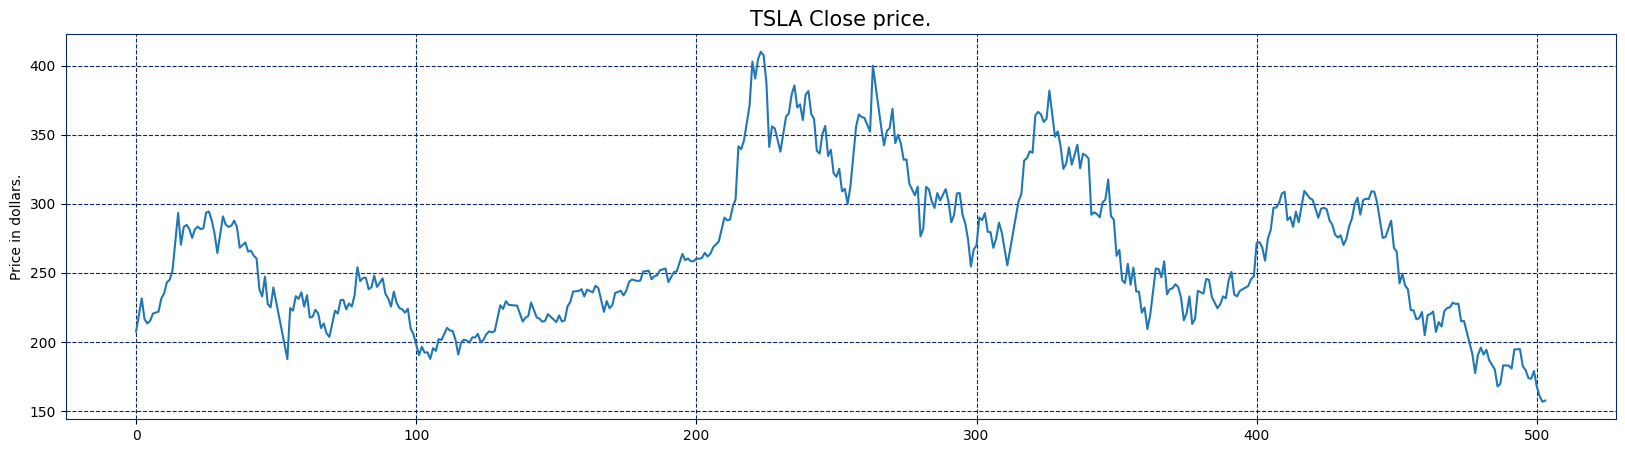

In [571]:
plt.figure(figsize=(20, 5))
plt.plot(df['Close'])
plt.title('TSLA Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [572]:
df[df['Close'] == df['Adj Close']].shape, df.shape

((504, 7), (504, 7))

In [573]:
df = df.drop(['Adj Close'], axis=1)

In [574]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

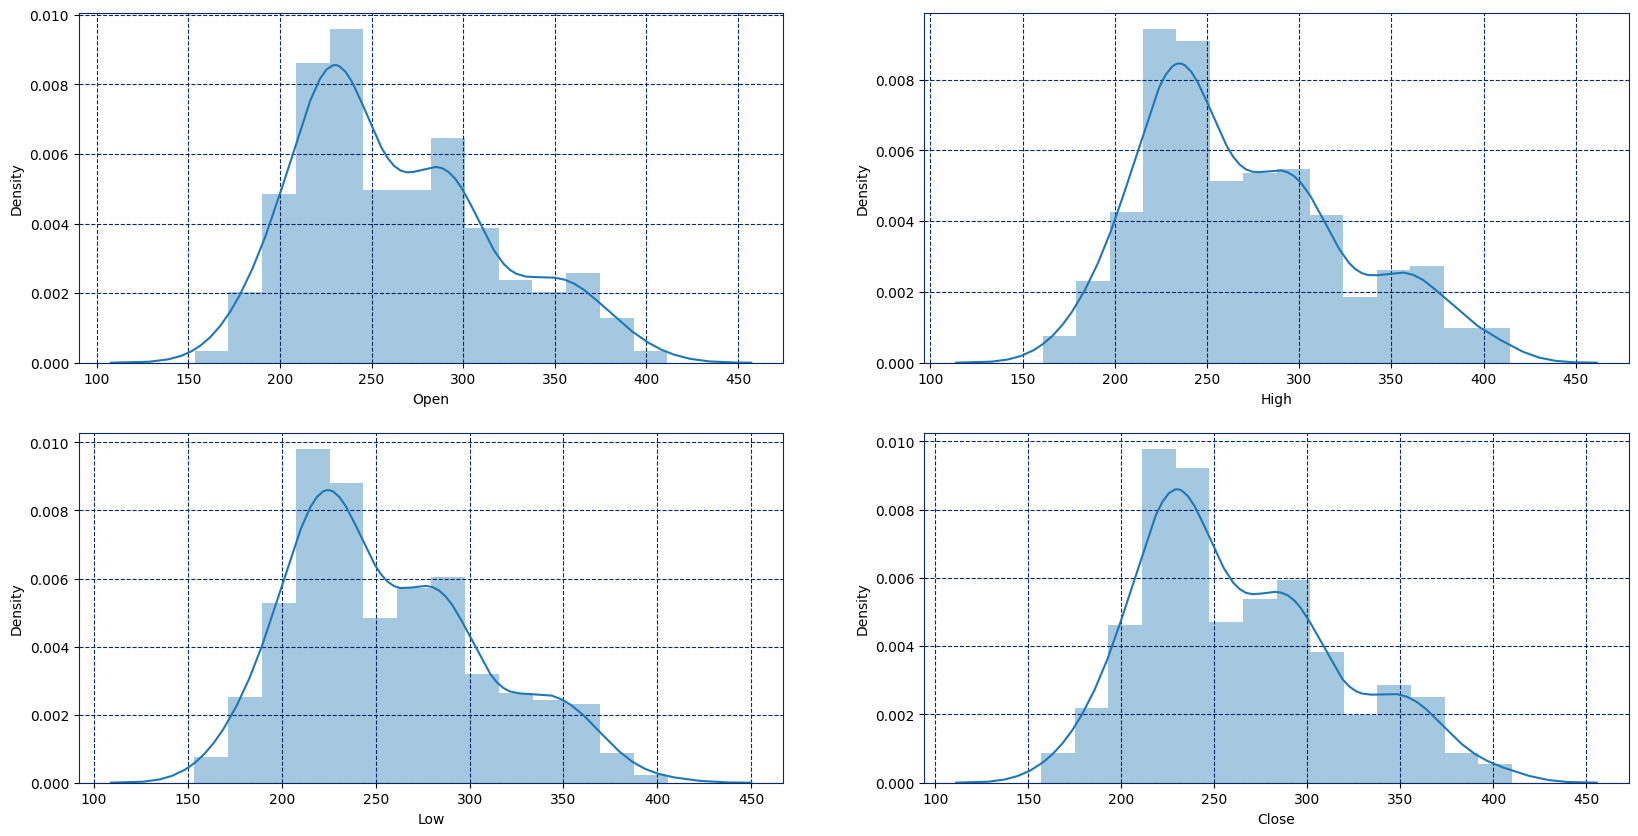

In [575]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sb.distplot(df[col])
plt.show()

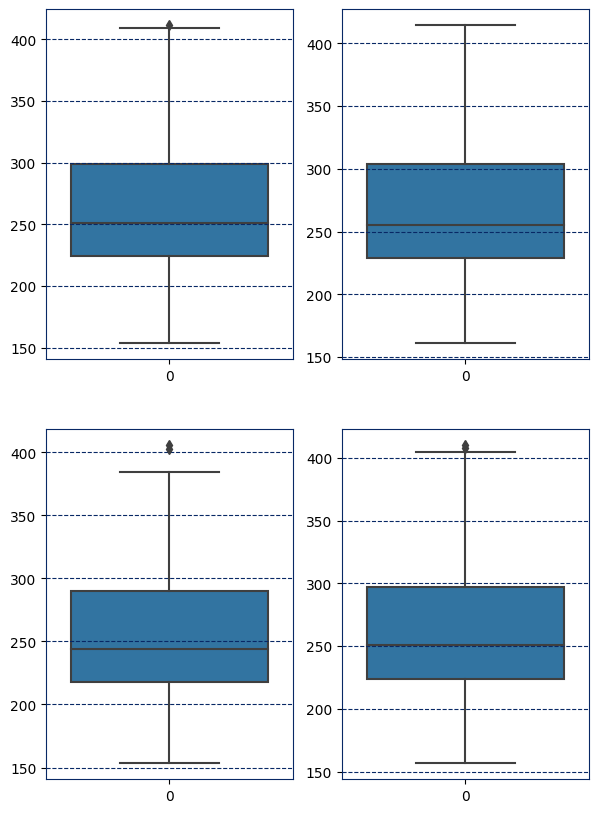

In [576]:
plt.subplots(figsize=(7,10))
for i, col in enumerate(features):
    plt.subplot(2,2,i+1)
    sb.boxplot(df[col])
plt.show()

In [577]:
splitted = df['Date'].str.split('/', expand=True)

df['day'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[2].astype('int')


df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,16/12/20,209.410004,210.833328,201.666672,207.589996,126287400,16,12,20
1,17/12/20,209.396667,219.606674,206.500000,218.633331,168810300,17,12,20
2,18/12/20,222.966660,231.666672,209.513336,231.666672,666378600,18,12,20
3,21/12/20,222.080002,222.833328,215.356674,216.619995,174135900,21,12,20
4,22/12/20,216.000000,216.626663,204.743332,213.446671,155148000,22,12,20


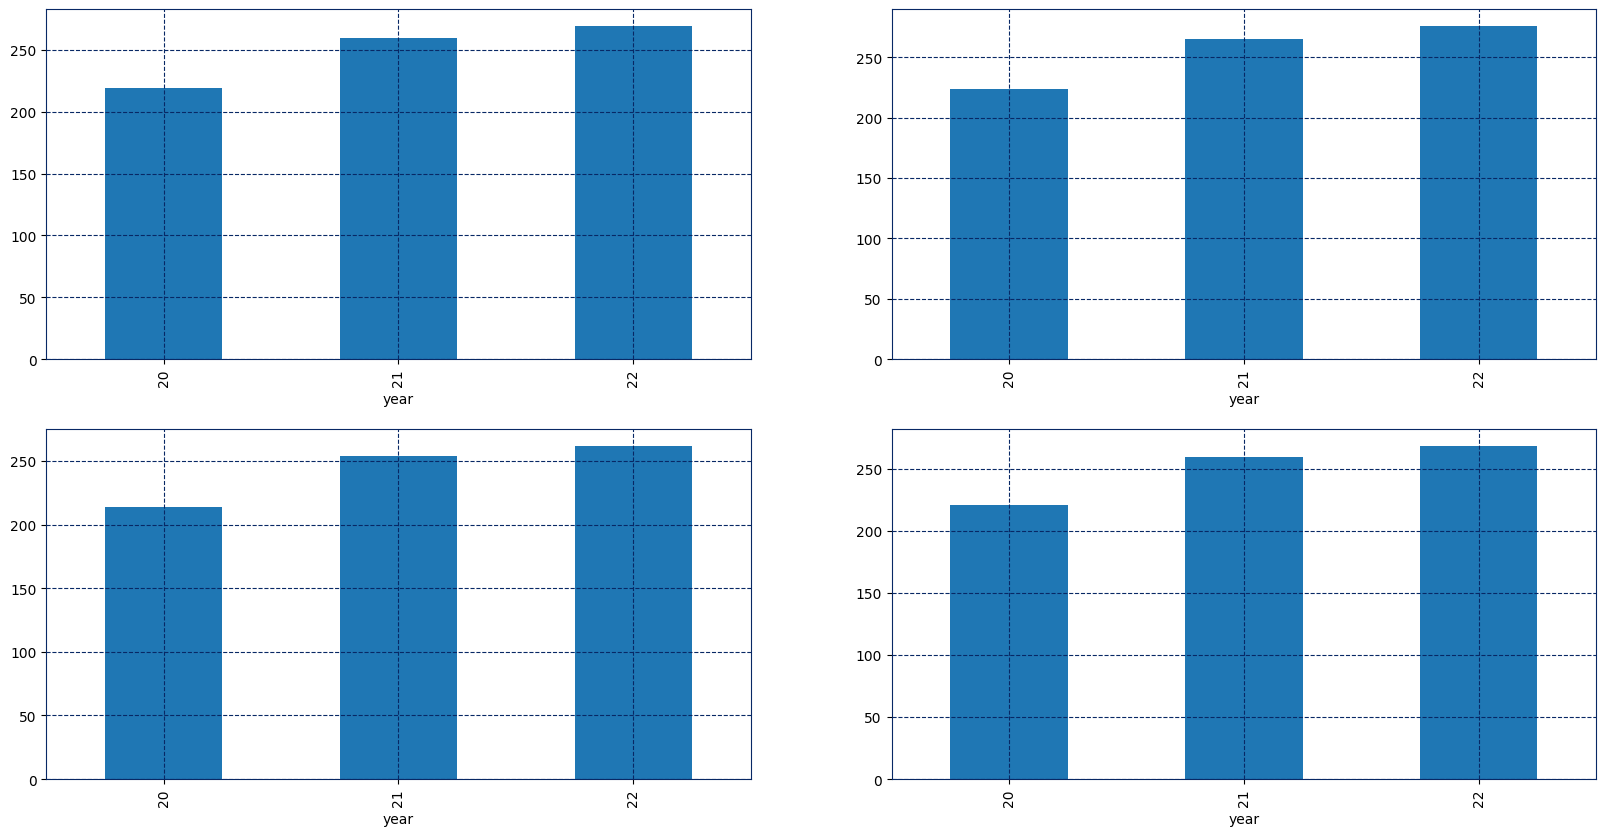

In [578]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()

In [579]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [580]:
# del df['sentiment']

In [581]:
import random

sentiments = [random.randint(0,1) for i in range(0, df.shape[0])]
sentiment_mark = [random.randint(0,100) for i in range(0, df.shape[0])]

df['sentiment'] = sentiments
df['sentiment_mark'] = sentiment_mark

In [582]:
INTERVAL = interval
INDICATORS = ['RSI', 'MACD', 'STOCH','ADL', 'ATR', 'MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV', 'VORTEX']

def _get_indicator_data(data):

    for indicator in INDICATORS:
        ind_data = eval('TA.' + indicator + '(df)')
        if not isinstance(ind_data, pd.DataFrame):
            ind_data = ind_data.to_frame()
        data = data.merge(ind_data, left_index=True, right_index=True)
    data.rename(columns={"14 period EMV.": '14 period EMV'}, inplace=True)

    data['ema50'] = data['Close'] / data['Close'].ewm(50).mean()
    data['ema21'] = data['Close'] / data['Close'].ewm(21).mean()
    data['ema15'] = data['Close'] / data['Close'].ewm(14).mean()
    data['ema5'] = data['Close'] / data['Close'].ewm(5).mean()

    data['normVol'] = data['Volume'] / data['Volume'].ewm(5).mean()

#     del (data['Open'])
#     del (data['High'])
#     del (data['Low'])
#     del (data['Volume'])
    
    data = data.dropna(axis=1, how='all')
    
    return data

df = _get_indicator_data(df)

In [583]:
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,open-close,...,OBV,20 period CCI,14 period EMV,VIm,VIp,ema50,ema21,ema15,ema5,normVol
0,16/12/20,209.410004,210.833328,201.666672,207.589996,126287400,16,12,20,1.820007,...,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000
1,17/12/20,209.396667,219.606674,206.500000,218.633331,168810300,17,12,20,-9.236664,...,168810300.0,66.666667,NaN,NaN,NaN,1.025647,1.025292,1.024994,1.023499,1.129304
2,18/12/20,222.966660,231.666672,209.513336,231.666672,666378600,18,12,20,-8.700012,...,835188900.0,100.000000,NaN,NaN,NaN,1.055642,1.054612,1.053747,1.049427,1.882594
3,21/12/20,222.080002,222.833328,215.356674,216.619995,174135900,21,12,20,5.460007,...,661053000.0,28.388484,NaN,NaN,NaN,0.990374,0.989794,0.989325,0.987220,0.588140
4,22/12/20,216.000000,216.626663,204.743332,213.446671,155148000,22,12,20,2.553329,...,505905000.0,-48.291389,NaN,NaN,NaN,0.980789,0.980601,0.980470,0.980199,0.604139


In [584]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'day', 'month',
       'year', 'open-close', 'low-high', 'target', 'sentiment',
       'sentiment_mark', '14 period RSI', 'MACD', 'SIGNAL',
       '14 period STOCH %K', 'MFV', '14 period ATR', 'MOM', '14 period MFI',
       'ROC', 'OBV', '20 period CCI', '14 period EMV', 'VIm', 'VIp', 'ema50',
       'ema21', 'ema15', 'ema5', 'normVol'],
      dtype='object')

In [585]:
# for i in range(0, df.shape[0]):
#     if math.isnan(df['20 period CCI'][i]):
#         df['20 period CCI'][i] = 0

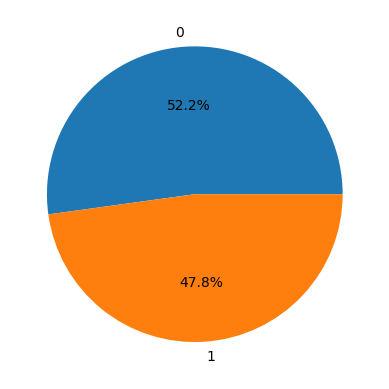

In [586]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

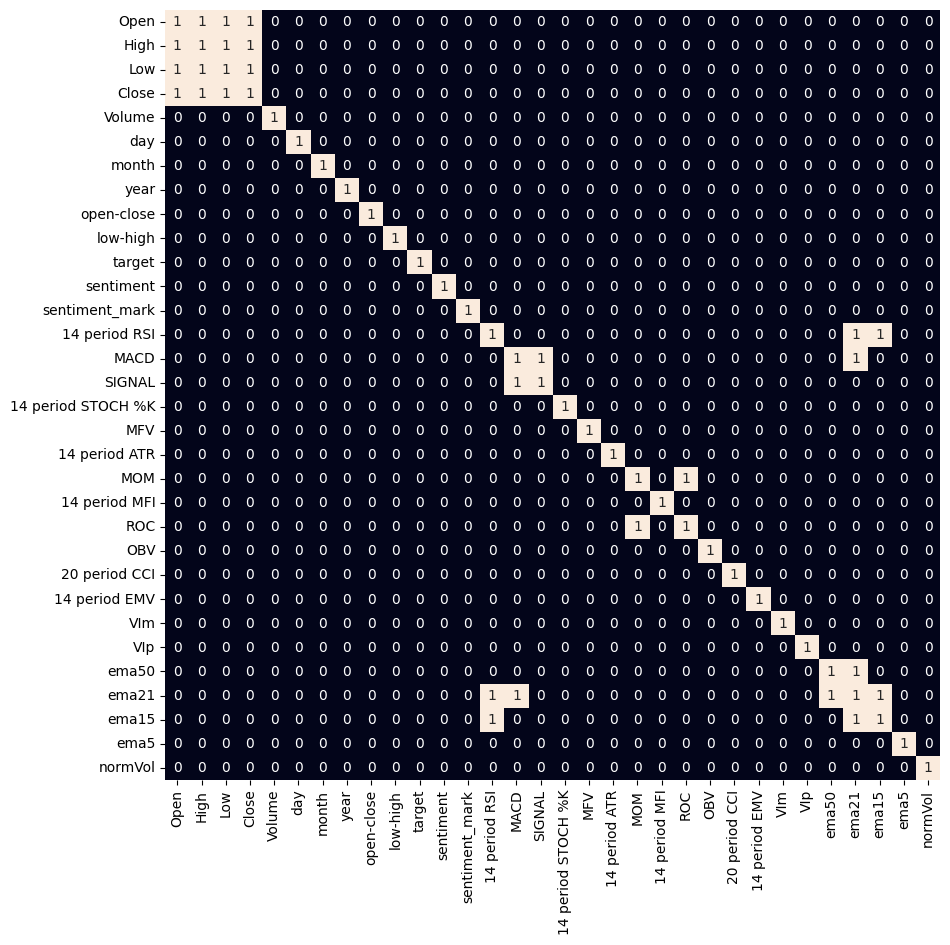

In [587]:
plt.figure(figsize=(10, 10))

sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [588]:
del df['14 period RSI']
del df['MACD']
del df['ema50']
del df['ema21']

del df['Open']
del df['High']
del df['Low']
del df['MOM']

In [ ]:
del df['ema15']

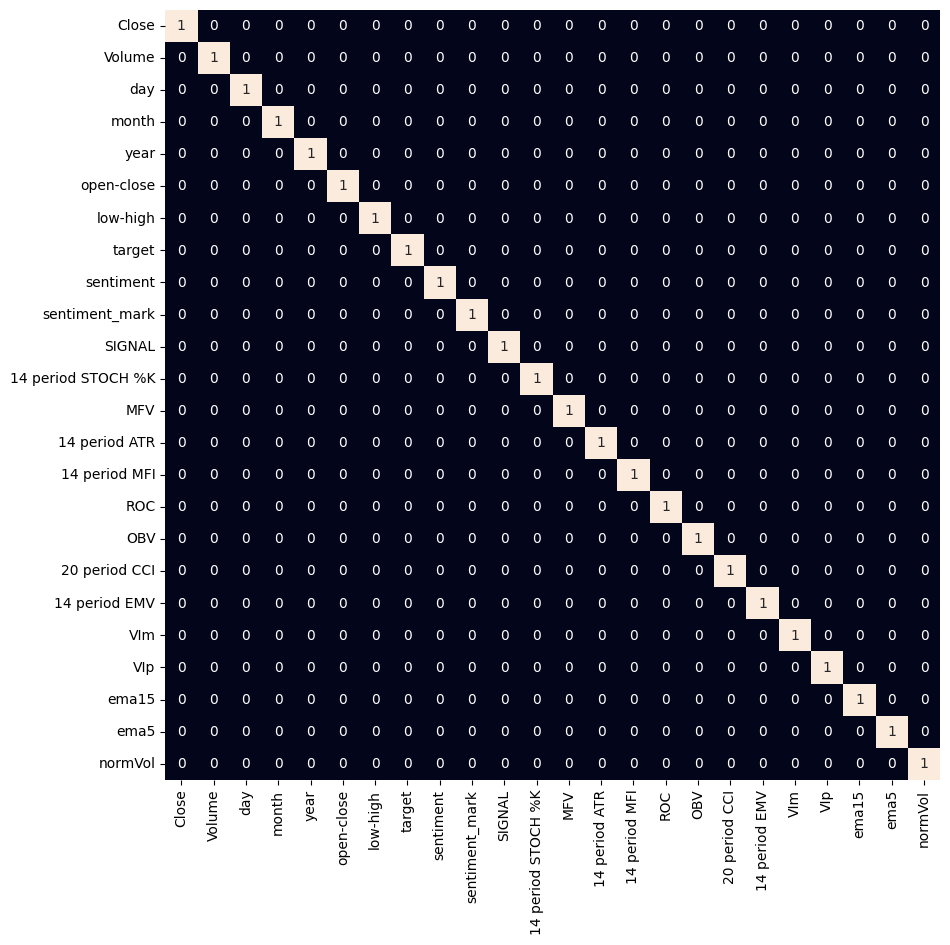

In [589]:
plt.figure(figsize=(10, 10))

sb.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [596]:
# нужно почистить наны


# data = df.iloc[19:-19]
data = df.dropna()
features = data[['Close', 'Volume', 'open-close', 'low-high', 'sentiment',
       'sentiment_mark', 'SIGNAL',
       '14 period STOCH %K', 'MFV', '14 period ATR', '14 period MFI',
       'ROC', 'OBV', '20 period CCI', '14 period EMV', 'VIm', 'VIp',
        'ema15', 'ema5', 'normVol']]
# features = [x for x in df.columns if x not in ['target'] and x not in ['Date']]
target = data['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.10, random_state=2022)
print(X_train.shape, X_valid.shape)

(440, 20) (49, 20)


In [599]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
    models[i].fit(X_train, Y_train)

    print(f'{models[i]} : ')
    print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
    print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]) + 0.05)
    print()

LogisticRegression() : 
Training Accuracy :  0.6344186046511628
Validation Accuracy :  0.48666666666666664

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.21412919896640828
Validation Accuracy :  0.5333333333333333

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.6

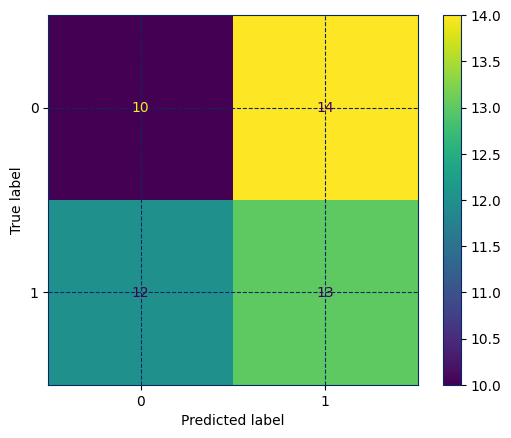

In [600]:
metrics.plot_confusion_matrix(models[0], X_valid, Y_valid)
plt.show()

# News scraper

In [76]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.firefox.options import Options
from selenium.webdriver import DesiredCapabilities

In [100]:
options = Options()
options.headless = True
options.page_load_strategy = 'eager'
options.set_preference('javascript.enabled', False)
options.set_preference("app.update.auto", False)
options.set_preference("app.update.enabled", False)




ticker = "TSLA"
period = "d"

total = 30

links = ["https://finviz.com"]
#         "https://www.ft.com/"]

opt_links = ["https://finviz.com/quote.ashx?t="+ticker+"&p="+period]

In [63]:
browser = webdriver.Firefox(options=options)
browser.get(opt_links[0])

news_container = browser.find_element(By.CLASS_NAME, 'fullview-news-outer')
news = []
dates = []

for element in news_container.find_elements(By.TAG_NAME, 'a')[:total]:
    news.append(element.get_attribute('href'))

for element in news_container.find_elements(By.TAG_NAME, 'td')[:total]:
    if element.get_attribute('width') == '130':
        dates.append(element.text)
        
print('done')

browser.quit()

done


In [64]:
unique_sites = set()
for site in news: 
    buff = site.split('.')
    unique_sites.add(buff[1])
    
sites_dict = {}
count = 0

for a in unique_sites:
    for site in news:
        if a in site:
            count += 1
    sites_dict[a] = count
    count = 0
    
print(len(news))
print(unique_sites)
print(sites_dict)

30
{'yahoo'}
{'yahoo': 30}


In [65]:
# print(str(len(news)) + ' || ' + str(len(dates)))

curr_date = ''
new_dates = []
curr_month = '12'

# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June',
#           'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


for date in dates[:total]:
    
    if int(ord(date[0])) > int(ord('9')):
        d, t = date.split(' ')
        month, day, year = d.split('-')

    month = curr_month
    new_dates.append(day + '/' + month + '/' + year)

In [101]:
articles = []
art = ""

for site in news[:total]:
    browser = webdriver.Firefox(options=options)
    browser.get(site)


    
    if 'yahoo' not in site:
        for paragraph in browser.find_elements(By.TAG_NAME, 'p'):
                art += paragraph.text
    else:
        try:
            link = browser.find_element(By.XPATH, '/html/body/div[3]/div[1]/div/main/div[1]/div/div/div/div/article/div/div/div/div/div/div[2]/div[4]/div/a')
            href = link.get_attribute('href')
            browser.get(href)
            for paragraph in browser.find_elements(By.TAG_NAME, 'p'):
                    art += paragraph.text
        except:
            b = browser.find_element(By.TAG_NAME, 'button')
            if b.text == 'Story continues':
                b.click()
            for paragraph in browser.find_elements(By.TAG_NAME, 'p'):
                    art += paragraph.text
                    
#         WebDriverWait(browser, 5.0)
#         browser.find_element(By.XPATH, '/html/body/div/div/div/div/form/div[2]/div[2]/button').click()
#         WebDriverWait(browser, 2.0)
#         for paragraph in browser.find_elements(By.TAG_NAME, 'p'):
#                 art += paragraph.text
            

    articles.append(art)
    art = ""
    
    browser.quit()
print("done")
# print(href)

done


In [103]:
# articles

In [29]:
from PIL import Image
import cv2
import numpy as np

image = cv2.imread('Side-Shot-35-removebg-preview.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh, BnW_image) = cv2.threshold(gray_image, 125, 255, cv2.THRESH_BINARY)

# window_name = 'image'
# cv2.imshow(window_name, image)
# cv2.imshow(window_name + '1', gray_image)
# cv2.imshow(window_name + '2', BnW_image)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

mask = np.array(image)

In [32]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from stop_words import get_stop_words


STOPWORDS = get_stop_words('english')


def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)
    plt.axis("off")

text = ''
    
for article in articles:
    if article != '':
        article = re.sub(r'==.*?==+', '', article)
        article = article.replace('\n', '')
    text += article
        
        
wordcloud = WordCloud(width = 2000, height = 1500, 
                      random_state=1, background_color='black', 
                      margin=20, colormap='Pastel1', collocations=False,
                      stopwords = STOPWORDS).generate(text)

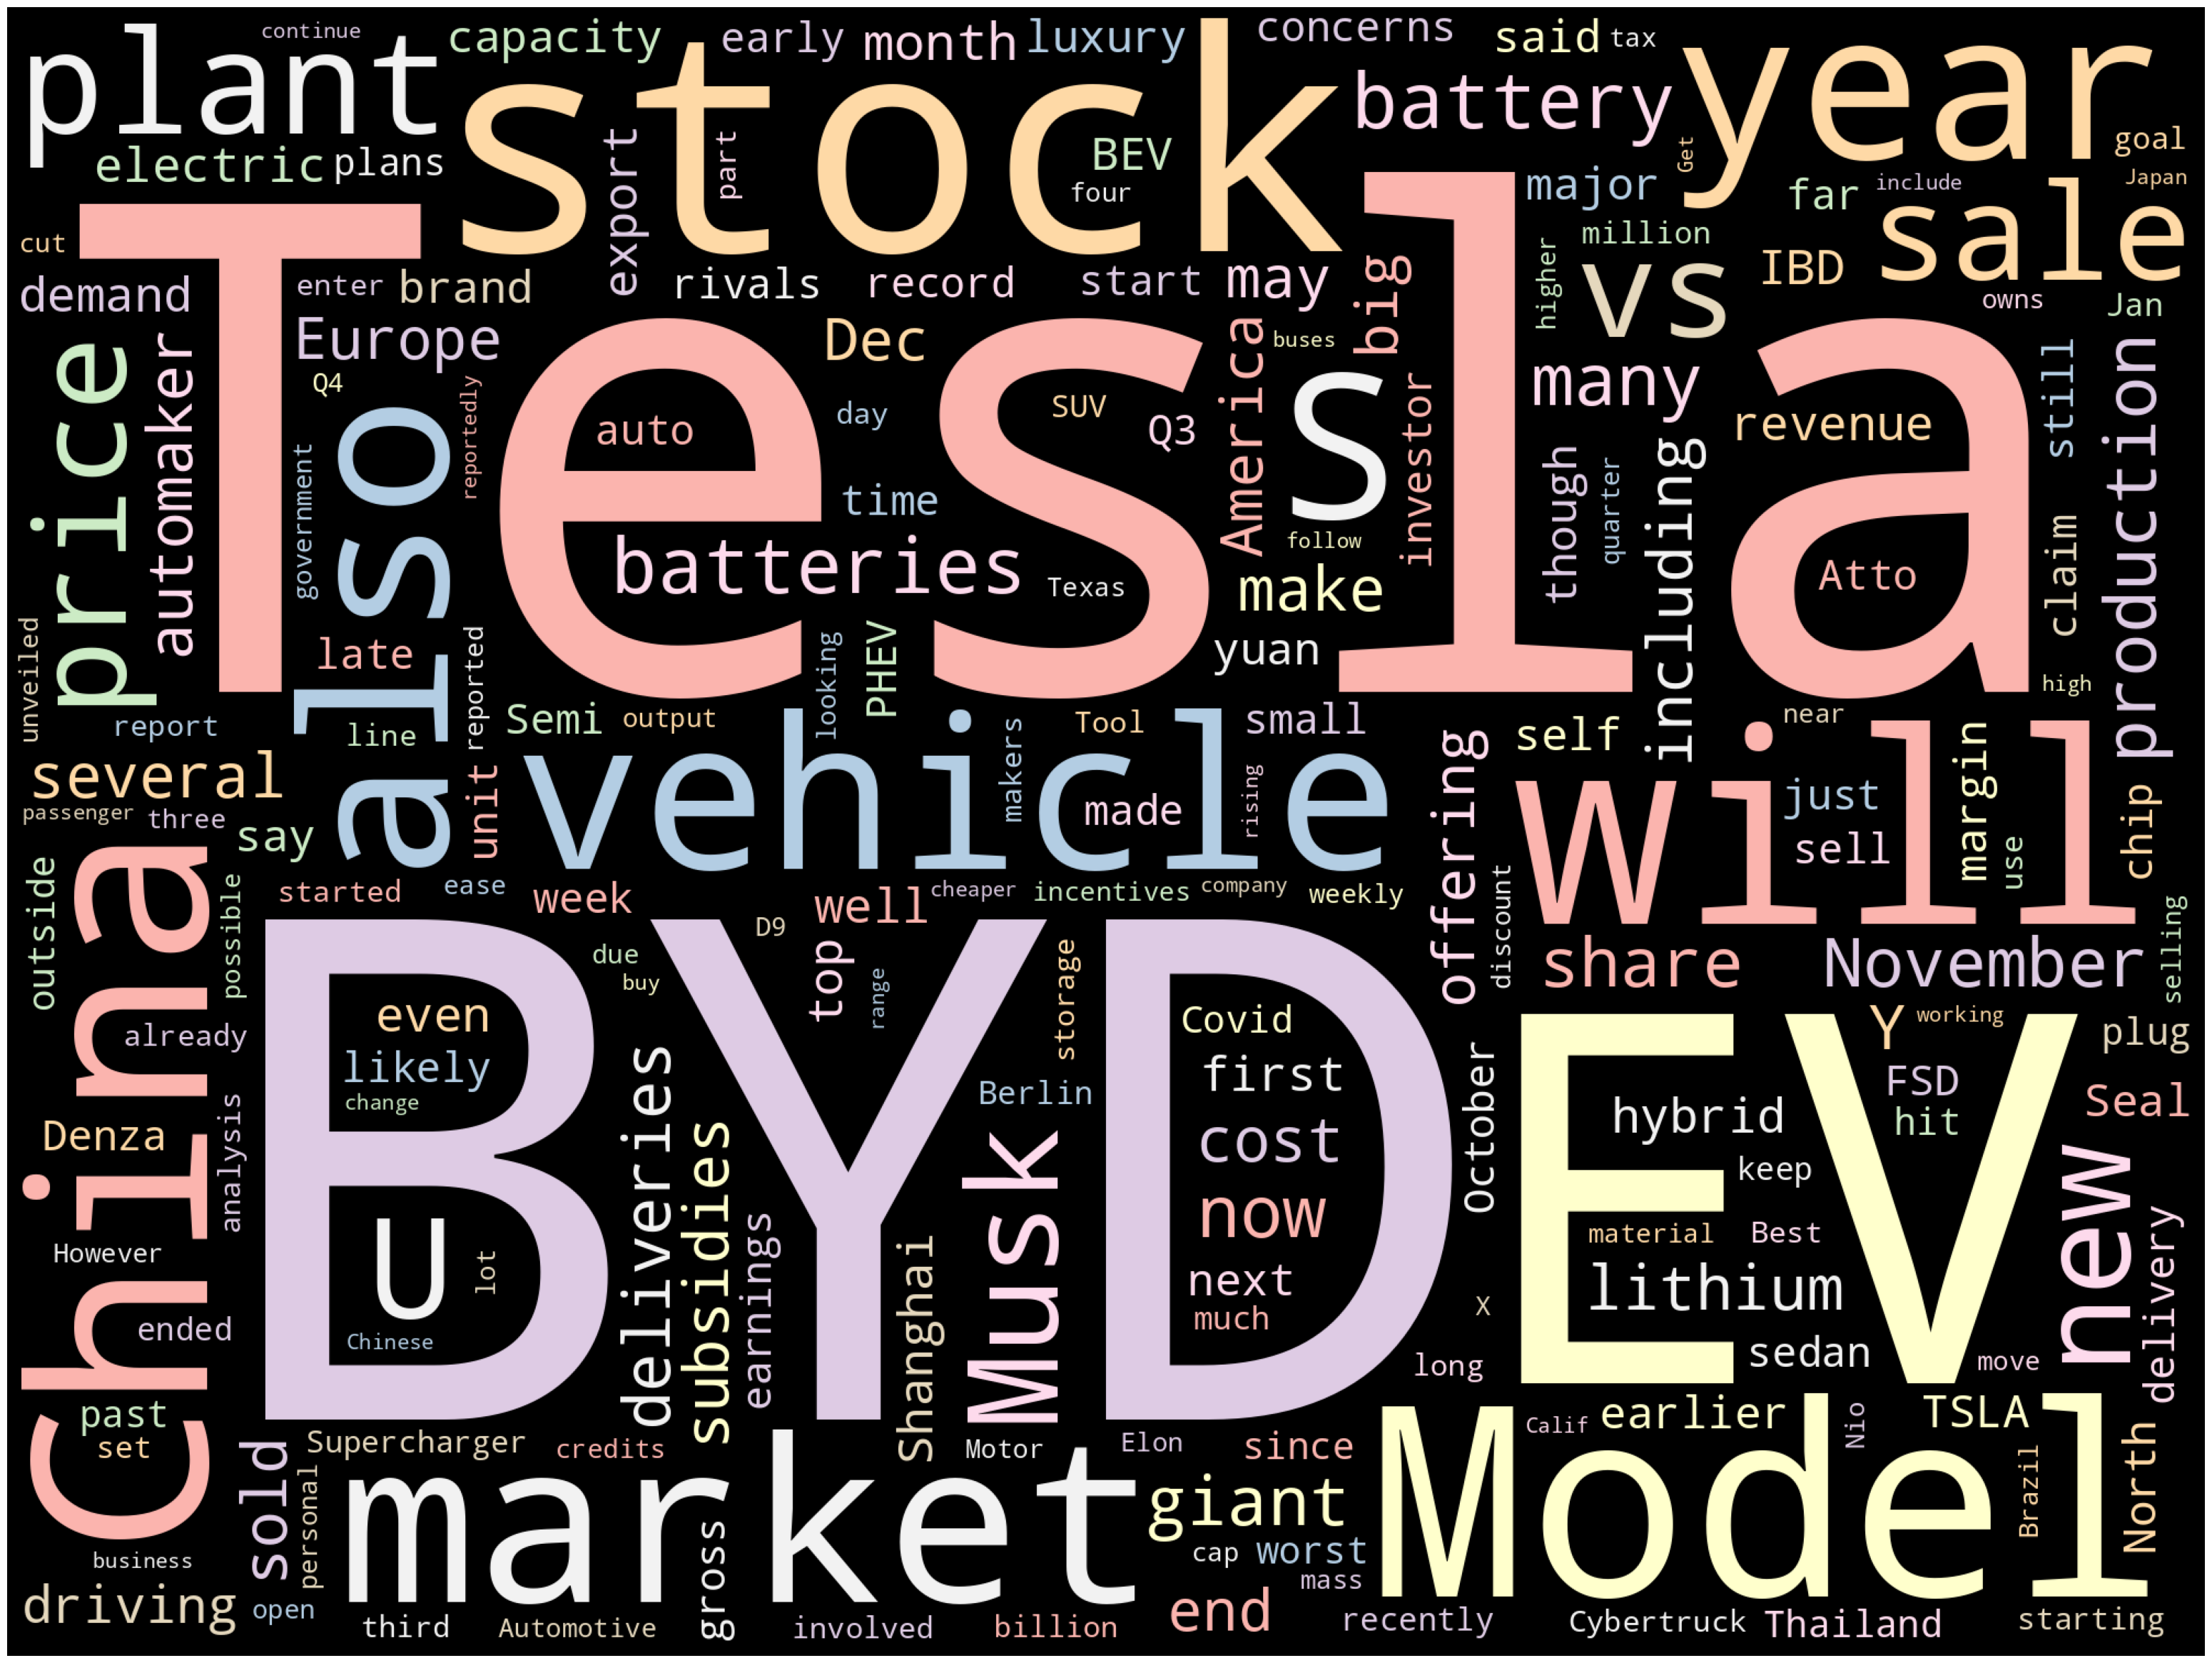

In [33]:
plot_cloud(wordcloud)

In [50]:
wordcloud.to_file('cloud.png')

In [51]:
articles

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'BREAKING: Market Clobbered Again To Cap Ugly WeekTesla (TSLA) and BYD Co. (BYDDF) are both fast-growing EV giants. While a lot of attention falls on startups such as Rivian Automotive (RIVN), Lucid (LCID), Nio (NIO), Xpeng (XPEV) and Li Auto (LI), as well as traditional automakers pushing into EVs, such as General Motors (GM) and Ford Motor (F), Tesla and BYD are setting the pace.Including plug-in hybrids, BYD has surged past Tesla sales. It\'s closing the gap on BEVs, with sales soaring yet again in November. BYD continues to open new plants, with plans for its first factories outside China, including Thailand, Brazil and, soon, Europe.Tesla China sales, including exports, hit a record in November following recent Shanghai capacity increases. But Tesla is offering fresh China price discounts amid increasing reports that it plans to slash or even suspend Shanghai output. It\'s also offering various year-e

In [44]:
# import csv

# Date, Close= [],[]

# with open('TSLA.csv', 'r') as f:
#     reader = csv.reader(f)
    
#     for row in reader:
#         Date.append(row[0])
#         Close.append(row[4])
        
# zipped_data = []
# news_data = []
# length = 1

# for i in range(1, len(new_dates) - 2):
#     curr_date = new_dates[0]
#     next_date = new_dates[i]
#     if next_date == curr_date:
#         length += 1
#     else:
#         length = 1
#     print(length)
    




In [611]:
# len(new_dates)
# len(articles)

In [34]:
# for i in range(0, len(articles)):
#     news_data.append(new_dates[i] + ' ||   ' + articles[i])
    
# for i in range(0, len(news_data)-1):
#     buff = ''
#     curr_date, a1 = news_data[i].split(' ||')
#     prev_date, a2 = news_data[i+1].split(' ||')
    
#     buff = curr_date + ' || ' + a1
    
#     if curr_date == prev_date:
#          buff = buff + '  |||  ' + a2
#     elif i == len(news_data)-2:
#         zipped_data.append(buff)
#     else:
#         zipped_data.append(buff)

In [619]:
# articles_col = ['' for i in range(0, len(Close) + 1)]
# curr_date = news[]

# for i in range(len(articles_col)-1,0):
#     for j in range(0, len(news_data)):
        
    
        

In [628]:
# news_data

In [35]:
# print(Date[-1] + ' || ' + news_data[3])

# Prediction model TRY

In [264]:
# ticker, json_path, csv_path, csv_file, period1, period2, interval, query_urls = stock_init()

In [265]:
# rm *.json TSLA.csv

In [266]:
# get_historic_price(query_urls, json_path, csv_path)

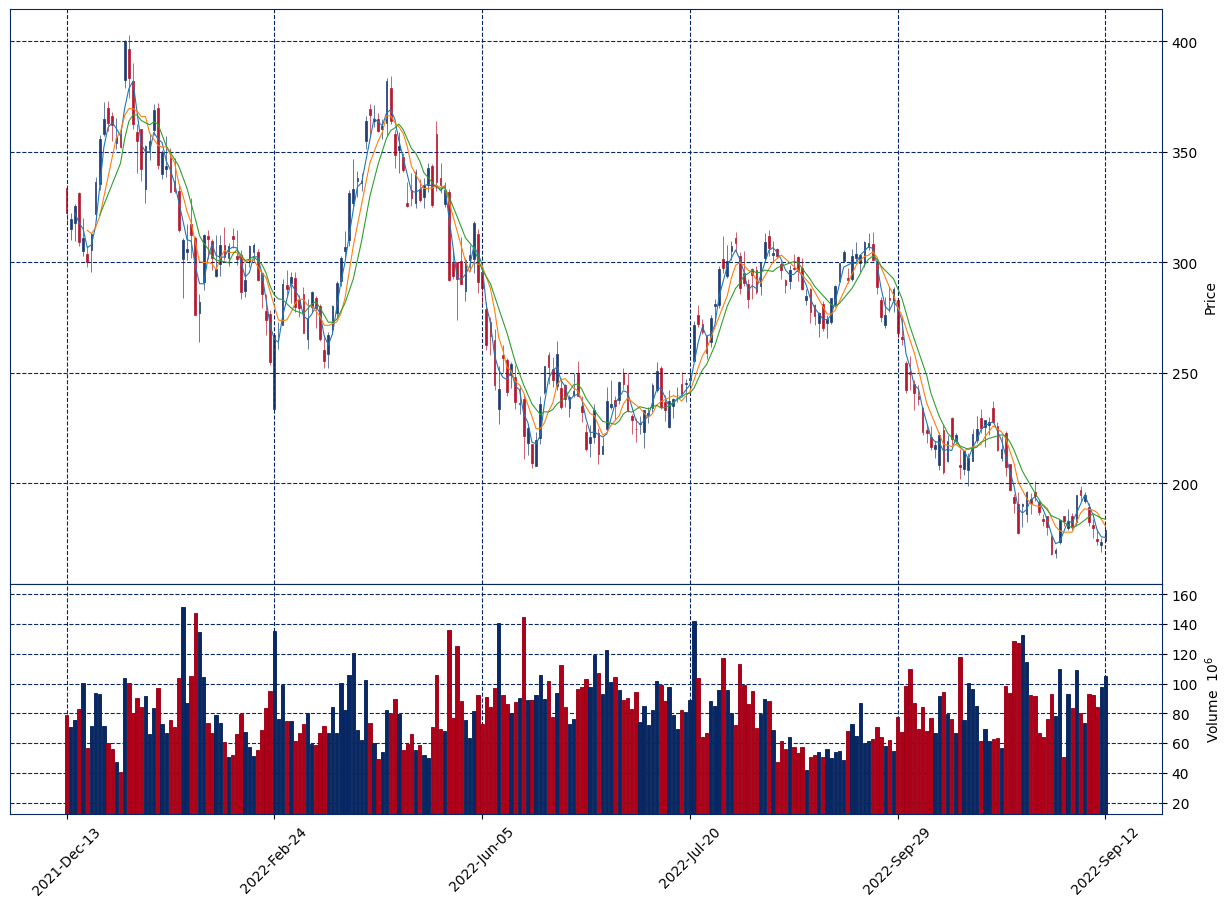

In [86]:
csv_draw(ticker + ".csv")

In [354]:
import datetime
import pandas as pd
import numpy as np
from finta import TA
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score

In [355]:
NUM_DAYS = 10000
INTERVAL = interval
symbol = ticker

INDICATORS = ['RSI', 'MACD', 'STOCH','ADL', 'ATR', 'MOM', 'MFI', 'ROC', 'OBV', 'CCI', 'EMV', 'VORTEX']

In [356]:
df = pd.read_csv(ticker + '2.csv')
df.head()
# df.shape

,Date,Open,High,Low,Close,Adj Close,Volume
0,16/12/20,209.410004,210.833328,201.666672,207.589996,207.589996,126287400
1,17/12/20,209.396667,219.606674,206.500000,218.633331,218.633331,168810300
2,18/12/20,222.966660,231.666672,209.513336,231.666672,231.666672,666378600
3,21/12/20,222.080002,222.833328,215.356674,216.619995,216.619995,174135900
4,22/12/20,216.000000,216.626663,204.743332,213.446671,213.446671,155148000


In [357]:
data = df

<AxesSubplot:>

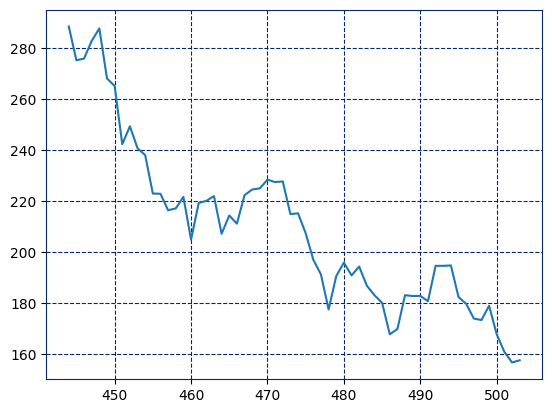

In [358]:
def _exponential_smooth(data, alpha):
    
    return df.ewm(alpha=alpha).mean()

df = _exponential_smooth(data, 0.65)

tmp1 = data.iloc[-60:]
tmp1['Close'].plot()

In [359]:
def _get_indicator_data(data):

    for indicator in INDICATORS:
        ind_data = eval('TA.' + indicator + '(df)')
        if not isinstance(ind_data, pd.DataFrame):
            ind_data = ind_data.to_frame()
        data = data.merge(ind_data, left_index=True, right_index=True)
    data.rename(columns={"14 period EMV.": '14 period EMV'}, inplace=True)

    # Also calculate moving averages for features
    data['ema50'] = data['Close'] / data['Close'].ewm(50).mean()
    data['ema21'] = data['Close'] / data['Close'].ewm(21).mean()
    data['ema15'] = data['Close'] / data['Close'].ewm(14).mean()
    data['ema5'] = data['Close'] / data['Close'].ewm(5).mean()

    # Instead of using the actual volume value (which changes over time), we normalize it with a moving volume average
    data['normVol'] = data['Volume'] / data['Volume'].ewm(5).mean()

    # Remove columns that won't be used as features
    del (data['Open'])
    del (data['High'])
    del (data['Low'])
    del (data['Volume'])
    del (data['Adj Close'])
    
    data = data.dropna(axis=1, how='all')
    
    return data

data = _get_indicator_data(data)
# print(data.columns)

In [360]:
data.shape[0]

504

In [361]:
train_len = 6
test_len = 3

def get_trains(data, train_len):
    y_train = []
    x_train = []
    y_test = []
    x_test = []
    curr_state = 0
    
    while curr_state < data.shape[0]:
        
        df = data.iloc[curr_state:curr_state+train_len]
        targets = df['Close']
        del (df['Close'])
        features = df
        
        x_train, x_test, y_train, y_test = train_test_split(features, targets,
                                                           test_size=0.3)
        
        del x_train['Date']
#         del y_train['Date']

        curr_state += train_len 
    return x_train, x_test, y_train, y_test

In [362]:
X_train, X_test, y_train, y_test = get_trains(data, train_len)

In [363]:
live_pred_data = data.iloc[-16:-11]

def _produce_prediction(data, window):
    
    prediction = (data.shift(-window)['Close'] >= data['Close'])
    prediction = prediction.iloc[:-window]
    data['pred'] = prediction.astype(int)
    
    return data

data = _produce_prediction(data, window=15)
del (data['Close'])
del (data['Date'])
data = data.dropna()
data.tail()

,14 period RSI,MACD,SIGNAL,14 period STOCH %K,MFV,14 period ATR,MOM,14 period MFI,ROC,OBV,20 period CCI,14 period EMV,VIm,VIp,ema50,ema21,ema15,ema5,normVol,pred
484,27.992593,-13.771525,-13.407995,8.377819,1.632924e+09,11.488622,-31.460208,35.778440,-18.611405,2.310098e+09,-104.039546,-0.375560,1.252141,0.785111,0.742328,0.819965,0.862080,0.939918,0.724798,0.0
485,26.530997,-13.955244,-13.517445,5.637492,1.619090e+09,11.370931,-28.743072,30.108068,-17.064797,2.236658e+09,-105.508374,-0.416388,1.271367,0.738533,0.734135,0.813778,0.856733,0.936390,0.877708,0.0
486,22.958888,-14.671471,-13.748250,2.241955,1.559037e+09,11.414623,-29.046580,24.240667,-20.272937,2.150580e+09,-121.220844,-0.518305,1.330023,0.654644,0.688205,0.766565,0.809043,0.891327,1.059283,0.0
487,22.295023,-15.215605,-14.041721,5.111256,1.554171e+09,10.999458,-24.069802,24.258857,-18.884738,2.069458e+09,-121.235751,-0.469561,1.352644,0.661687,0.700738,0.783866,0.828884,0.917114,0.910692,0.0
488,31.355018,-14.831978,-14.199773,19.405544,1.623809e+09,10.858136,-4.777930,30.718104,-11.369504,2.169050e+09,-91.012442,-0.361718,1.277902,0.711285,0.759188,0.851169,0.900095,0.990690,1.216476,0.0


In [364]:
y_train

503    157.669998
498    173.440002
500    167.820007
501    160.949997
Name: Close, dtype: float64

In [365]:
def _train_random_forest(X_train, y_train, X_test, y_test):
    
    rf = RandomForestClassifier()
    params_rf = {'n_estimators': [110,130,140,150,160,180,200]}
    rf_gs = GridSearchCV(rf, params_rf, cv=5)
    rf_gs.fit(X_train, y_train)
    rf_best = rf_gs.best_estimator_
        
    print(rf_gs.best_params_)
    
    prediction = rf_best.predict(X_test)

    print(classification_report(y_test, prediction))
    print(confusion_matrix(y_test, prediction))
    
    return rf_best
    
# rf_model = _train_random_forest(X_train, y_train, X_test, y_test)

In [366]:
def _train_KNN(X_train, y_train, X_test, y_test):

    knn = KNeighborsClassifier()
    params_knn = {'n_neighbors': np.arange(1, 25)}
    knn_gs = GridSearchCV(knn, params_knn, cv=5)
    knn_gs.fit(X_train, y_train)
    knn_best = knn_gs.best_estimator_
    
    print(knn_gs.best_params_)
    
    prediction = knn_best.predict(X_test)

    print(classification_report(y_test, prediction))
    print(confusion_matrix(y_test, prediction))
    
    return knn_best
    
    
# knn_model = _train_KNN(X_train, y_train, X_test, y_test)

In [367]:
def _ensemble_model(rf_model, knn_model, X_train, y_train, X_test, y_test):
    
    estimators=[('knn', knn_model), ('rf', rf_model)]
    ensemble = VotingClassifier(estimators, voting='hard')
    ensemble.fit(X_train, y_train)
    
    print(ensemble.score(X_test, y_test))
    
    prediction = ensemble.predict(X_test)

    print(classification_report(y_test, prediction))
    print(confusion_matrix(y_test, prediction))
    
    return ensemble
    
# ensemble_model = _ensemble_model(rf_model, knn_model, gbt_model, X_train, y_train, X_test, y_test)

In [368]:
df = data

def cross_Validation(data):
    
    num_train = 10
    len_train = 40
    
    rf_RESULTS = []
    knn_RESULTS = []
    ensemble_RESULTS = []
    
    i = 0
    while True:
        
        df = data.iloc[i * num_train : (i * num_train) + len_train]
        i += 1
        print(i * num_train, (i * num_train) + len_train)
        
        if len(df) < 40:
            break
        
        y = df['pred']
        features = [x for x in df.columns if x not in ['pred']]
        X = df[features]

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 7 * len(X) // 10,shuffle=False)
        
        rf_model = _train_random_forest(X_train, y_train, X_test, y_test)
        knn_model = _train_KNN(X_train, y_train, X_test, y_test)
        ensemble_model = _ensemble_model(rf_model, knn_model, X_train, y_train, X_test, y_test)
        
        rf_prediction = rf_model.predict(X_test)
        knn_prediction = knn_model.predict(X_test)
        ensemble_prediction = ensemble_model.predict(X_test)
        
        print('rf prediction is ', rf_prediction)
        print('knn prediction is ', knn_prediction)
        print('ensemble prediction is ', ensemble_prediction)
        print('truth values are ', y_test.values)
        
        rf_accuracy = accuracy_score(y_test.values, rf_prediction)
        knn_accuracy = accuracy_score(y_test.values, knn_prediction)
        ensemble_accuracy = accuracy_score(y_test.values, ensemble_prediction)
        
        print(rf_accuracy, knn_accuracy, ensemble_accuracy)
        rf_RESULTS.append(rf_accuracy)
        knn_RESULTS.append(knn_accuracy)
        ensemble_RESULTS.append(ensemble_accuracy)
        
        
    print('RF Accuracy = ' + str( sum(rf_RESULTS) / len(rf_RESULTS)))
    print('KNN Accuracy = ' + str( sum(knn_RESULTS) / len(knn_RESULTS)))
    print('Ensemble Accuracy = ' + str( sum(ensemble_RESULTS) / len(ensemble_RESULTS)))
    
    
cross_Validation(data)

10 50
{'n_estimators': 140}
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91        10
         1.0       0.00      0.00      0.00         2

    accuracy                           0.83        12
   macro avg       0.42      0.50      0.45        12
weighted avg       0.69      0.83      0.76        12

[[10  0]
 [ 2  0]]
{'n_neighbors': 4}
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91        10
         1.0       0.00      0.00      0.00         2

    accuracy                           0.83        12
   macro avg       0.42      0.50      0.45        12
weighted avg       0.69      0.83      0.76        12

[[10  0]
 [ 2  0]]
0.8333333333333334
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91        10
         1.0       0.00      0.00      0.00         2

    accuracy                           0.83        12
   macro avg       0.42 

{'n_neighbors': 2}
              precision    recall  f1-score   support

         0.0       0.42      1.00      0.59         5
         1.0       0.00      0.00      0.00         7

    accuracy                           0.42        12
   macro avg       0.21      0.50      0.29        12
weighted avg       0.17      0.42      0.25        12

[[5 0]
 [7 0]]
0.4166666666666667
              precision    recall  f1-score   support

         0.0       0.42      1.00      0.59         5
         1.0       0.00      0.00      0.00         7

    accuracy                           0.42        12
   macro avg       0.21      0.50      0.29        12
weighted avg       0.17      0.42      0.25        12

[[5 0]
 [7 0]]
rf prediction is  [0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1.]
knn prediction is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
ensemble prediction is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
truth values are  [1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0.]
0.5833333333333334 0.4166666666666667 0.4166666

{'n_neighbors': 5}
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.92      0.96        12

    accuracy                           0.92        12
   macro avg       0.50      0.46      0.48        12
weighted avg       1.00      0.92      0.96        12

[[ 0  0]
 [ 1 11]]
0.75
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.75      0.86        12

    accuracy                           0.75        12
   macro avg       0.50      0.38      0.43        12
weighted avg       1.00      0.75      0.86        12

[[0 0]
 [3 9]]
rf prediction is  [1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
knn prediction is  [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.]
ensemble prediction is  [1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.]
truth values are  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
0.8333333333333334 0.9166666666666666 0.75
140 180
{'n_es

{'n_estimators': 110}
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        11
         1.0       0.08      1.00      0.15         1

    accuracy                           0.08        12
   macro avg       0.04      0.50      0.08        12
weighted avg       0.01      0.08      0.01        12

[[ 0 11]
 [ 0  1]]
{'n_neighbors': 5}
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        11
         1.0       0.00      0.00      0.00         1

    accuracy                           0.92        12
   macro avg       0.46      0.50      0.48        12
weighted avg       0.84      0.92      0.88        12

[[11  0]
 [ 1  0]]
0.9166666666666666
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        11
         1.0       0.00      0.00      0.00         1

    accuracy                           0.92        12
   macro avg       0.46      0

{'n_estimators': 130}
              precision    recall  f1-score   support

         0.0       0.56      0.83      0.67         6
         1.0       0.67      0.33      0.44         6

    accuracy                           0.58        12
   macro avg       0.61      0.58      0.56        12
weighted avg       0.61      0.58      0.56        12

[[5 1]
 [4 2]]
{'n_neighbors': 2}
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         6
         1.0       0.00      0.00      0.00         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12
weighted avg       0.25      0.50      0.33        12

[[6 0]
 [6 0]]
0.5
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         6
         1.0       0.00      0.00      0.00         6

    accuracy                           0.50        12
   macro avg       0.25      0.50      0.33        12

{'n_neighbors': 1}
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         9
         1.0       0.00      0.00      0.00         3

    accuracy                           0.75        12
   macro avg       0.38      0.50      0.43        12
weighted avg       0.56      0.75      0.64        12

[[9 0]
 [3 0]]
0.75
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         9
         1.0       0.00      0.00      0.00         3

    accuracy                           0.75        12
   macro avg       0.38      0.50      0.43        12
weighted avg       0.56      0.75      0.64        12

[[9 0]
 [3 0]]
rf prediction is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
knn prediction is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
ensemble prediction is  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
truth values are  [1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.]
0.75 0.75 0.75
330 370
{'n_estimators': 150}
              pr

{'n_estimators': 110}
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.92      1.00      0.96        11

    accuracy                           0.92        12
   macro avg       0.46      0.50      0.48        12
weighted avg       0.84      0.92      0.88        12

[[ 0  1]
 [ 0 11]]
{'n_neighbors': 1}
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.75      0.27      0.40        11

    accuracy                           0.25        12
   macro avg       0.38      0.14      0.20        12
weighted avg       0.69      0.25      0.37        12

[[0 1]
 [8 3]]
0.25
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.75      0.27      0.40        11

    accuracy                           0.25        12
   macro avg       0.38      0.14      0.20     

# Predicting model

In [102]:
# rm *.json TSLA.csv

In [116]:
ticker, json_path, csv_path, csv_file, period1, period2, interval, query_urls = stock_init()

1670851628 || 22/12/12
1639315628 || 12/12/21


In [117]:
rm *.json TSLA.csv

In [118]:
get_historic_price(query_urls, json_path, csv_path)

>>>  Historical data of TSLA saved


In [119]:
def stock_data_gathering(ticker, query_url, json_path,
                        csv_path, csv_file):
    check_internet()
    get_historic_price(query_url,json_path,csv_path)
#     csv_draw(csv_file)


stock_data_gathering(ticker, query_urls, json_path,
                        csv_path, csv_file)

<<<  Historical data of TSLA already exists


In [122]:
import tensorflow as tf

In [123]:
df = pd.read_csv(ticker + '.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,13/12/21,333.696655,335.000000,317.140015,322.136658,322.136658,78595500
1,14/12/21,315.000000,322.136658,310.000000,319.503326,319.503326,70806300
2,15/12/21,317.736664,326.250000,309.416656,325.329987,325.329987,75169200
3,16/12/21,331.500000,331.660004,307.283325,308.973328,308.973328,82771500
4,17/12/21,304.923340,320.220001,303.013336,310.856659,310.856659,100437300


In [124]:
TIME = range(0, df.shape[0])
SERIES = df['Close']
SPLIT_TIME = 200
WINDOW_SIZE = 20
BATCH_SIZE = 32
SAMPLE_BUFFER = 170

In [125]:
def train_val_split(time, series, time_step=SPLIT_TIME):

    time_train = time[:time_step]
    series_train = series[:time_step]
    time_valid = time[time_step:]
    series_valid = series[time_step:]

    return time_train, series_train, time_valid, series_valid

def windowed_dataset(series, window_size=WINDOW_SIZE, batch_size=BATCH_SIZE, shuffle_buffer=SAMPLE_BUFFER):

    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [127]:
_, series_train, _, _ = train_val_split(TIME, SERIES, time_step = SPLIT_TIME)
dataset = windowed_dataset(series_train)
time_train, series_train, time_valid, series_valid = train_val_split(TIME, SERIES)

In [131]:
def create_uncompiled_model():
  
    model = tf.keras.models.Sequential([ 
      tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                    input_shape=[None]),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(1024, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(512, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
      tf.keras.layers.Dense(1),
  ]) 

    return model

In [132]:
class EarlyStopping(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    
    if(logs.get('mae') < 0.03):
      print("\nMAEthreshold reached. Training stopped.")
      self.model.stop_training = True

early_stopping = EarlyStopping()

In [138]:
def create_model():
#     tf.random.set_seed(51)
  
    model = create_uncompiled_model()
  
    model.compile(loss=tf.keras.losses.Huber(), 
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics=["mae"])  
    return model
  
model = create_model()

history = model.fit(dataset, epochs=10, callbacks=[early_stopping])

Epoch 1/10
6/6 [==============================] - 16s 1s/step - loss: 281.0763 - mae: 281.5763
Epoch 2/10
6/6 [==============================] - 7s 1s/step - loss: 276.0035 - mae: 276.5035
Epoch 3/10
6/6 [==============================] - 7s 1s/step - loss: 272.8865 - mae: 273.3865
Epoch 4/10
6/6 [==============================] - 8s 1s/step - loss: 271.1676 - mae: 271.6676
Epoch 5/10
6/6 [==============================] - 7s 1s/step - loss: 270.0651 - mae: 270.5651
Epoch 6/10
6/6 [==============================] - 7s 1s/step - loss: 269.1329 - mae: 269.6329
Epoch 7/10
6/6 [==============================] - 8s 1s/step - loss: 268.2233 - mae: 268.7233
Epoch 8/10
6/6 [==============================] - 7s 1s/step - loss: 267.3313 - mae: 267.8313
Epoch 9/10
6/6 [==============================] - 7s 1s/step - loss: 266.4471 - mae: 266.9471
Epoch 10/10
6/6 [==============================] - 7s 1s/step - loss: 265.5752 - mae: 266.0752


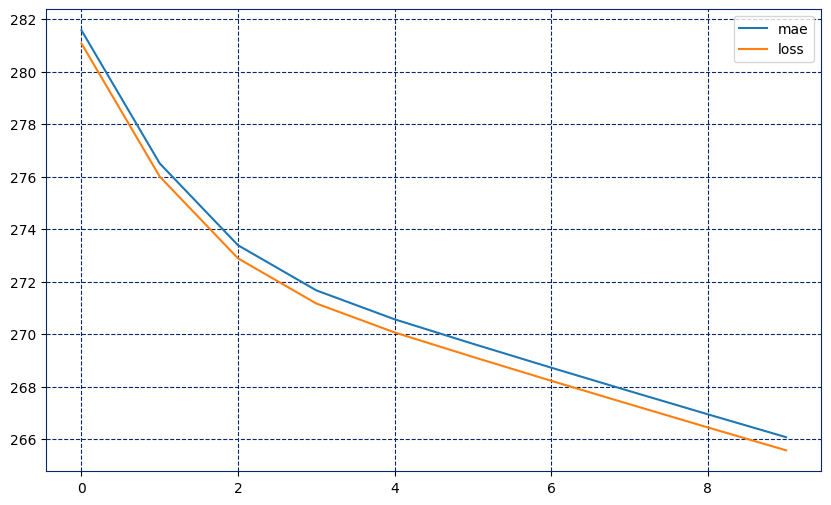

In [139]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['loss'], label='loss')
plt.legend()
plt.show()

In [140]:
def compute_metrics(true_series, forecast):

    mse = tf.keras.metrics.mean_squared_error(true_series, forecast).numpy()
    mae = tf.keras.metrics.mean_absolute_error(true_series, forecast).numpy()

    return mse, mae

def model_forecast(model, series, window_size):

    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

<AxesSubplot:>

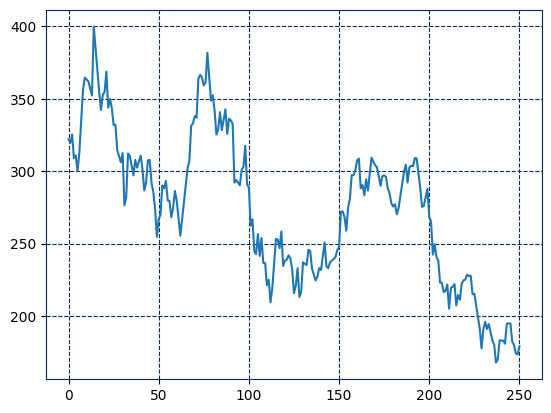

In [141]:
df['Close'].plot()

8/8 [==============================] - 4s 230ms/step


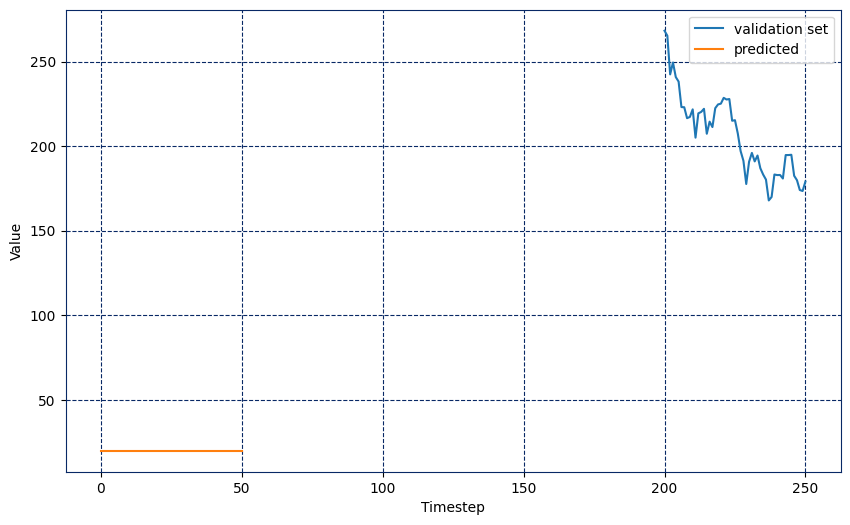

In [142]:
all_forecast = model_forecast(model, SERIES, WINDOW_SIZE).squeeze()
val_forecast = all_forecast[SPLIT_TIME - WINDOW_SIZE:-1]

plt.figure(figsize=(10, 6))
plt.plot(series_valid, label="validation set")
plt.plot(val_forecast, label="predicted")
plt.xlabel("Timestep")
plt.ylabel("Value")
plt.legend()
plt.show()

# LSTM training model

In [371]:
import numpy as np
from matplotlib import pyplot
import csv

from keras.layers import Dense, LSTM, Input, Dropout, Embedding, Bidirectional
from keras.utils import pad_sequences
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.optimizers import Adam
from keras.preprocessing.text import Tokenizer, text_to_word_sequence

In [372]:
dataset = []
maxStrokeLen = 0

with open("stock_data.csv") as f:
    reader = csv.reader(f)
    for row in reader:
            dataset.append(row[0].strip())
            
for i in dataset:
    if i:
        if len(i) > maxStrokeLen:
            maxStrokeLen = len(i)
        
maxStrokesCount = len(dataset) - 1
    
print(maxStrokeLen)
print(maxStrokesCount)

154
5791


In [373]:
maxStrokeLen = 200
maxStrokesCount = 6000
maxWordLen = 12

positiveCount = 3685
negativeCount = 2106

tokenizer = Tokenizer(num_words=maxStrokesCount, lower=True, split=' ', char_level=False)
tokenizer.fit_on_texts(dataset)

dist = list(tokenizer.word_counts.items())


data = tokenizer.texts_to_sequences(dataset)
data_pad = pad_sequences(data, maxlen = maxWordLen)

X = data_pad
Y = np.array([[1,0]]*positiveCount + [[0,1]]*negativeCount)
print(X.shape, Y.shape)

(5792, 12) (5791, 2)


In [374]:
indeces = np.random.choice(X.shape[0]-1, size=X.shape[0]-1, replace=False)
X = X[indeces]
Y = Y[indeces]

In [375]:
model = Sequential()
model.add(Embedding(maxStrokesCount, 128, input_length = maxWordLen))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(2, activation='softmax'))
model.summary()

2022-12-16 13:51:56.680908: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-16 13:51:56.681366: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-16 13:51:56.681390: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ShuPC): /proc/driver/nvidia/version does not exist
2022-12-16 13:51:56.681854: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 12, 128)           768000    
                                                                 
 lstm (LSTM)                 (None, 12, 128)           131584    
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 2)                 130       
                                                                 
Total params: 949,122
Trainable params: 949,122
Non-trainable params: 0
_________________________________________________________________


In [376]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(0.0001))

In [377]:
history = model.fit(X, Y, batch_size=32, epochs=15)

reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))

Epoch 1/15
181/181 [==============================] - 5s 13ms/step - loss: 0.6456 - accuracy: 0.6465
Epoch 2/15
181/181 [==============================] - 2s 13ms/step - loss: 0.5157 - accuracy: 0.7672
Epoch 3/15
181/181 [==============================] - 2s 13ms/step - loss: 0.4160 - accuracy: 0.8092
Epoch 4/15
181/181 [==============================] - 2s 13ms/step - loss: 0.3516 - accuracy: 0.8418
Epoch 5/15
181/181 [==============================] - 2s 13ms/step - loss: 0.2988 - accuracy: 0.8705
Epoch 6/15
181/181 [==============================] - 2s 13ms/step - loss: 0.2581 - accuracy: 0.8879
Epoch 7/15
181/181 [==============================] - 2s 13ms/step - loss: 0.2255 - accuracy: 0.9030
Epoch 8/15
181/181 [==============================] - 2s 13ms/step - loss: 0.1979 - accuracy: 0.9175
Epoch 9/15
181/181 [==============================] - 2s 13ms/step - loss: 0.1787 - accuracy: 0.9244
Epoch 10/15
181/181 [==============================] - 2s 13ms/step - loss: 0.1620 - accura

In [378]:
def sequence_to_text(list_of_indices):
    words = [reverse_word_map.get(letter) for letter in list_of_indices]
    return(words)

In [379]:
t = "The oil brent is growing up! Economists predicts plus 5 precent to the cost".lower()
data = tokenizer.texts_to_sequences([t])
data_pad = pad_sequences(data, maxlen=maxWordLen)
print( sequence_to_text(data[0]) )

res = model.predict(data_pad)
print(res, np.argmax(res), sep='\n')

t1 = "Monday's relative weakness. NYX WIN TIE TAP ICE INT BMC AON C CHK BIIB  ".lower()
data = tokenizer.texts_to_sequences([t1])
data_pad = pad_sequences(data, maxlen=maxWordLen)
print( sequence_to_text(data[0]) )

res = model.predict(data_pad)
print(res, np.argmax(res), sep='\n')

t2 = "URALS brend is going higher and higher! Economysts forecasts a 10 precent growh in a week".lower()
data = tokenizer.texts_to_sequences([t2])
data_pad = pad_sequences(data, maxlen=maxWordLen)
print( sequence_to_text(data[0]) )

res = model.predict(data_pad)
print(res, np.argmax(res), sep='\n')

['the', 'oil', 'is', 'growing', 'up', 'economists', 'predicts', 'plus', '5', 'to', 'the', 'cost']
1/1 [==============================] - 1s 543ms/step
[[5.8414944e-06 9.9999416e-01]]
1
["monday's", 'relative', 'weakness', 'nyx', 'win', 'tie', 'tap', 'ice', 'int', 'bmc', 'aon', 'c', 'chk', 'biib']
1/1 [==============================] - 0s 20ms/step
[[9.9985313e-01 1.4686449e-04]]
0
['is', 'going', 'higher', 'and', 'higher', 'forecasts', 'a', '10', 'in', 'a', 'week']
1/1 [==============================] - 0s 18ms/step
[[0.00199993 0.9980001 ]]
1
